In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import time

In [2]:
from joblib import dump,load
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
des_list=['orb','sift','brisk']

orb=cv2.ORB_create()
sift=cv2.SIFT_create(nfeatures=500)
brisk=cv2.BRISK_create()

#orb=load('written_models/orb_descriptor.joblib')
#sift=load('written_models/sift_descriptor.joblib')
#brisk=load('written_models/brisk_descriptor.joblib')

In [4]:
descriptor=dict()

descriptor['orb']=orb
descriptor['sift']=sift
descriptor['brisk']=brisk

In [5]:
kmeans=dict()

for i in des_list:
    kmeans[i]=load(f'written_models/{i}_kmeans.joblib')

In [6]:
logreg=dict()
svm=dict()
randomforest=dict()

for i in des_list:
    logreg[i]=load(f'written_models/{i}_logreg.joblib')
    svm[i]=load(f'written_models/{i}_svm.joblib')
    randomforest[i]=load(f'written_models/{i}_randomforest.joblib')

In [7]:
def create_bag(labels_list):
    res=np.zeros((10*4,))
    for i in labels_list:
        res[i]+=1
    return res

def preprocess_image(img,estimator):
    img=cv2.resize( img, (img.shape[0]//4,img.shape[1]//4) )
    kp,des=descriptor[estimator].detectAndCompute(img,None)
    if(des is None):
        return None
    des=des.astype('float32')
    if(des.shape[0]>500):
        des=des[:500,:]
    kmeans_labels=kmeans[estimator].predict(des)
    bag_of_words=create_bag(kmeans_labels)
    return bag_of_words

In [8]:
#movie_name="stepler.mp4"
#movie_name='karabin.mp4'
movie_name='IMG_5360.MOV'

In [9]:
#LogisticRegression
cap=cv2.VideoCapture(movie_name)
print("Logistic Regression:")
counter=0

logreg_df=[]

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        #plt.imsave(f'frames_video/frame{counter}.png',frame)
        counter+=1
        
        vect=dict()
        temp_dict=dict()
        string=''
        for i in des_list:
            start_time=time.time()
            
            vect[i]=preprocess_image(frame,i)
            temp=vect[i].reshape((1,vect[i].shape[0]))
            pred=logreg[i].predict(temp)
            temp_dict[i]=pred
            
            delta_time=round(time.time()-start_time, 3)
            temp_dict[f'{i}_time']=delta_time
            string+=f'{delta_time}s {i}:{pred}\t'
        print(string)
        logreg_df.append(temp_dict)
    else:
        break
#закрыть захват видео
cap.release()
logreg_df=pd.DataFrame(logreg_df)
#print(logreg_df[:30])

Logistic Regression:
0.029s orb:['hryvnia']	0.14s sift:['hryvnia']	0.019s brisk:['hryvnia']	
0.039s orb:['hryvnia']	0.126s sift:['hryvnia']	0.058s brisk:['hryvnia']	
0.039s orb:['hryvnia']	0.063s sift:['hryvnia']	0.017s brisk:['hryvnia']	
0.063s orb:['hryvnia']	0.1s sift:['hryvnia']	0.019s brisk:['hryvnia']	
0.039s orb:['hryvnia']	0.059s sift:['hryvnia']	0.009s brisk:['hryvnia']	
0.049s orb:['hryvnia']	0.066s sift:['hryvnia']	0.032s brisk:['hryvnia']	
0.023s orb:['hryvnia']	0.079s sift:['hryvnia']	0.012s brisk:['hryvnia']	
0.044s orb:['hryvnia']	0.089s sift:['hryvnia']	0.028s brisk:['hryvnia']	
0.014s orb:['hryvnia']	0.058s sift:['hryvnia']	0.014s brisk:['hryvnia']	
0.018s orb:['hryvnia']	0.076s sift:['hryvnia']	0.019s brisk:['hryvnia']	
0.042s orb:['hryvnia']	0.087s sift:['hryvnia']	0.013s brisk:['trash']	
0.024s orb:['hryvnia']	0.078s sift:['hryvnia']	0.033s brisk:['hryvnia']	
0.026s orb:['hryvnia']	0.064s sift:['hryvnia']	0.01s brisk:['hryvnia']	
0.019s orb:['hryvnia']	0.091s sift:[

0.019s orb:['hryvnia']	0.101s sift:['hryvnia']	0.006s brisk:['hryvnia']	
0.032s orb:['hryvnia']	0.105s sift:['hryvnia']	0.025s brisk:['hryvnia']	
0.038s orb:['hryvnia']	0.083s sift:['hryvnia']	0.012s brisk:['hryvnia']	
0.033s orb:['hryvnia']	0.07s sift:['hryvnia']	0.017s brisk:['hryvnia']	
0.012s orb:['hryvnia']	0.106s sift:['hryvnia']	0.012s brisk:['hryvnia']	
0.017s orb:['hryvnia']	0.064s sift:['hryvnia']	0.011s brisk:['hryvnia']	
0.011s orb:['hryvnia']	0.096s sift:['hryvnia']	0.014s brisk:['hryvnia']	
0.015s orb:['hryvnia']	0.056s sift:['hryvnia']	0.007s brisk:['hryvnia']	
0.029s orb:['hryvnia']	0.066s sift:['hryvnia']	0.009s brisk:['hryvnia']	
0.026s orb:['hryvnia']	0.086s sift:['hryvnia']	0.017s brisk:['hryvnia']	
0.045s orb:['hryvnia']	0.102s sift:['hryvnia']	0.006s brisk:['hryvnia']	
0.015s orb:['hryvnia']	0.042s sift:['hryvnia']	0.008s brisk:['hryvnia']	
0.016s orb:['hryvnia']	0.045s sift:['hryvnia']	0.006s brisk:['hryvnia']	
0.013s orb:['hryvnia']	0.039s sift:['hryvnia']	0.013

0.018s orb:['trash']	0.095s sift:['stepler']	0.049s brisk:['karabin']	
0.017s orb:['trash']	0.095s sift:['trash']	0.1s brisk:['karabin']	
0.048s orb:['hryvnia']	0.113s sift:['stepler']	0.033s brisk:['karabin']	
0.037s orb:['trash']	0.093s sift:['stepler']	0.065s brisk:['karabin']	
0.02s orb:['trash']	0.081s sift:['stepler']	0.022s brisk:['karabin']	
0.09s orb:['trash']	0.065s sift:['trash']	0.032s brisk:['karabin']	
0.007s orb:['trash']	0.052s sift:['trash']	0.027s brisk:['karabin']	
0.023s orb:['trash']	0.06s sift:['trash']	0.035s brisk:['karabin']	
0.015s orb:['trash']	0.091s sift:['stepler']	0.022s brisk:['trash']	
0.03s orb:['trash']	0.121s sift:['stepler']	0.028s brisk:['karabin']	
0.015s orb:['trash']	0.052s sift:['stepler']	0.023s brisk:['karabin']	
0.013s orb:['trash']	0.082s sift:['stepler']	0.071s brisk:['karabin']	
0.03s orb:['trash']	0.045s sift:['karabin']	0.034s brisk:['karabin']	
0.013s orb:['trash']	0.071s sift:['stepler']	0.045s brisk:['karabin']	
0.023s orb:['trash']	

0.011s orb:['hryvnia']	0.095s sift:['hryvnia']	0.007s brisk:['hryvnia']	
0.016s orb:['hryvnia']	0.043s sift:['hryvnia']	0.01s brisk:['hryvnia']	
0.012s orb:['hryvnia']	0.048s sift:['hryvnia']	0.012s brisk:['hryvnia']	
0.037s orb:['hryvnia']	0.091s sift:['hryvnia']	0.042s brisk:['hryvnia']	
0.031s orb:['trash']	0.106s sift:['hryvnia']	0.018s brisk:['hryvnia']	
0.024s orb:['hryvnia']	0.154s sift:['hryvnia']	0.018s brisk:['hryvnia']	
0.03s orb:['hryvnia']	0.106s sift:['trash']	0.008s brisk:['hryvnia']	
0.02s orb:['hryvnia']	0.093s sift:['hryvnia']	0.014s brisk:['hryvnia']	
0.027s orb:['hryvnia']	0.137s sift:['hryvnia']	0.007s brisk:['hryvnia']	
0.036s orb:['hryvnia']	0.108s sift:['hryvnia']	0.008s brisk:['hryvnia']	
0.035s orb:['hryvnia']	0.049s sift:['hryvnia']	0.021s brisk:['hryvnia']	
0.012s orb:['hryvnia']	0.067s sift:['trash']	0.01s brisk:['hryvnia']	
0.03s orb:['hryvnia']	0.047s sift:['hryvnia']	0.017s brisk:['hryvnia']	
0.036s orb:['hryvnia']	0.076s sift:['hryvnia']	0.044s brisk:['

In [10]:
#SVM
cap=cv2.VideoCapture(movie_name)
print("SVM:")
counter=0

svm_df=[]

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        #plt.imsave(f'frames_video/frame{counter}.png',frame)
        counter+=1
        
        vect=dict()
        temp_dict=dict()
        string=''
        for i in des_list:
            start_time=time.time()
            vect[i]=preprocess_image(frame,i)
            temp=vect[i].reshape((1,vect[i].shape[0]))
            pred=svm[i].predict(temp)
            temp_dict[i]=pred
            
            delta_time=round( time.time()-start_time,3)
            temp_dict[f'{i}_time']=delta_time
            string+=f'{delta_time}s {i}:{pred}\t'
        print(string)
        svm_df.append(temp_dict)
    else:
        break
#закрыть захват видео
cap.release()
svm_df=pd.DataFrame(svm_df)
#print(svm_df[:30])

SVM:
0.039s orb:['hryvnia']	0.109s sift:['hryvnia']	0.023s brisk:['hryvnia']	
0.064s orb:['hryvnia']	0.041s sift:['hryvnia']	0.039s brisk:['hryvnia']	
0.016s orb:['hryvnia']	0.076s sift:['hryvnia']	0.014s brisk:['hryvnia']	
0.058s orb:['hryvnia']	0.067s sift:['hryvnia']	0.007s brisk:['hryvnia']	
0.01s orb:['hryvnia']	0.034s sift:['hryvnia']	0.018s brisk:['stepler']	
0.069s orb:['hryvnia']	0.039s sift:['hryvnia']	0.012s brisk:['hryvnia']	
0.017s orb:['hryvnia']	0.038s sift:['hryvnia']	0.015s brisk:['hryvnia']	
0.016s orb:['hryvnia']	0.047s sift:['hryvnia']	0.012s brisk:['hryvnia']	
0.021s orb:['hryvnia']	0.049s sift:['hryvnia']	0.007s brisk:['hryvnia']	
0.009s orb:['hryvnia']	0.051s sift:['hryvnia']	0.035s brisk:['hryvnia']	
0.029s orb:['hryvnia']	0.053s sift:['trash']	0.011s brisk:['trash']	
0.024s orb:['hryvnia']	0.074s sift:['hryvnia']	0.032s brisk:['hryvnia']	
0.033s orb:['hryvnia']	0.061s sift:['hryvnia']	0.01s brisk:['trash']	
0.031s orb:['hryvnia']	0.062s sift:['trash']	0.009s br

0.019s orb:['hryvnia']	0.052s sift:['hryvnia']	0.007s brisk:['hryvnia']	
0.027s orb:['hryvnia']	0.052s sift:['hryvnia']	0.014s brisk:['hryvnia']	
0.025s orb:['hryvnia']	0.084s sift:['hryvnia']	0.012s brisk:['hryvnia']	
0.019s orb:['hryvnia']	0.044s sift:['hryvnia']	0.004s brisk:['hryvnia']	
0.008s orb:['hryvnia']	0.044s sift:['trash']	0.011s brisk:['hryvnia']	
0.018s orb:['hryvnia']	0.041s sift:['trash']	0.008s brisk:['trash']	
0.021s orb:['hryvnia']	0.035s sift:['hryvnia']	0.012s brisk:['hryvnia']	
0.023s orb:['hryvnia']	0.123s sift:['hryvnia']	0.013s brisk:['hryvnia']	
0.019s orb:['hryvnia']	0.068s sift:['hryvnia']	0.006s brisk:['trash']	
0.028s orb:['hryvnia']	0.041s sift:['hryvnia']	0.006s brisk:['hryvnia']	
0.011s orb:['hryvnia']	0.042s sift:['hryvnia']	0.022s brisk:['trash']	
0.027s orb:['hryvnia']	0.057s sift:['hryvnia']	0.011s brisk:['hryvnia']	
0.016s orb:['hryvnia']	0.031s sift:['hryvnia']	0.006s brisk:['hryvnia']	
0.022s orb:['hryvnia']	0.105s sift:['hryvnia']	0.017s brisk:[

0.008s orb:['trash']	0.037s sift:['karabin']	0.034s brisk:['karabin']	
0.026s orb:['trash']	0.053s sift:['trash']	0.084s brisk:['karabin']	
0.011s orb:['trash']	0.057s sift:['trash']	0.024s brisk:['karabin']	
0.009s orb:['trash']	0.032s sift:['trash']	0.017s brisk:['trash']	
0.011s orb:['trash']	0.031s sift:['karabin']	0.017s brisk:['trash']	
0.012s orb:['trash']	0.04s sift:['trash']	0.04s brisk:['trash']	
0.021s orb:['trash']	0.039s sift:['trash']	0.023s brisk:['trash']	
0.034s orb:['trash']	0.095s sift:['trash']	0.087s brisk:['trash']	
0.025s orb:['trash']	0.079s sift:['trash']	0.049s brisk:['karabin']	
0.031s orb:['trash']	0.091s sift:['karabin']	0.048s brisk:['trash']	
0.015s orb:['trash']	0.064s sift:['karabin']	0.023s brisk:['karabin']	
0.011s orb:['trash']	0.129s sift:['trash']	0.039s brisk:['karabin']	
0.023s orb:['trash']	0.039s sift:['trash']	0.024s brisk:['karabin']	
0.02s orb:['trash']	0.152s sift:['trash']	0.025s brisk:['trash']	
0.013s orb:['trash']	0.039s sift:['trash']	

0.018s orb:['hryvnia']	0.095s sift:['hryvnia']	0.009s brisk:['hryvnia']	
0.012s orb:['hryvnia']	0.082s sift:['hryvnia']	0.007s brisk:['hryvnia']	
0.01s orb:['hryvnia']	0.043s sift:['hryvnia']	0.009s brisk:['hryvnia']	
0.072s orb:['hryvnia']	0.065s sift:['trash']	0.007s brisk:['hryvnia']	
0.011s orb:['hryvnia']	0.041s sift:['karabin']	0.009s brisk:['hryvnia']	
0.014s orb:['hryvnia']	0.061s sift:['hryvnia']	0.017s brisk:['hryvnia']	
0.02s orb:['hryvnia']	0.089s sift:['trash']	0.011s brisk:['trash']	
0.009s orb:['hryvnia']	0.032s sift:['trash']	0.007s brisk:['trash']	
0.016s orb:['hryvnia']	0.075s sift:['trash']	0.021s brisk:['hryvnia']	
0.038s orb:['hryvnia']	0.073s sift:['hryvnia']	0.011s brisk:['trash']	


In [11]:
#Random Forest
cap=cv2.VideoCapture(movie_name)
print("Random Forest:")
counter=0

randomforest_df=[]

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        counter+=1
        vect=dict()
        temp_dict=dict()
        string=''
        for i in des_list:
            start_time= time.time()
            vect[i]=preprocess_image(frame,i)
            temp=vect[i].reshape((1,vect[i].shape[0]))
            pred=randomforest[i].predict(temp)
            temp_dict[i]=pred
            
            delta_time=round(time.time()-start_time,3)
            temp_dict[f'{i}_time']=delta_time
            string+=f'{delta_time}s {i}:{pred}\t'
        print(string)
        randomforest_df.append(temp_dict)
    else:
        break
#закрыть захват видео
cap.release()
randomforest_df=pd.DataFrame(randomforest_df)
#print(randomforest_df[:30])

Random Forest:
0.065s orb:['hryvnia']	0.13s sift:['hryvnia']	0.047s brisk:['hryvnia']	
0.118s orb:['hryvnia']	0.065s sift:['hryvnia']	0.135s brisk:['hryvnia']	
0.06s orb:['hryvnia']	0.066s sift:['hryvnia']	0.114s brisk:['hryvnia']	
0.128s orb:['hryvnia']	0.066s sift:['hryvnia']	0.09s brisk:['hryvnia']	
0.119s orb:['hryvnia']	0.091s sift:['hryvnia']	0.053s brisk:['hryvnia']	
0.042s orb:['hryvnia']	0.125s sift:['hryvnia']	0.056s brisk:['hryvnia']	
0.06s orb:['hryvnia']	0.059s sift:['hryvnia']	0.039s brisk:['hryvnia']	
0.046s orb:['hryvnia']	0.105s sift:['hryvnia']	0.043s brisk:['hryvnia']	
0.045s orb:['hryvnia']	0.092s sift:['hryvnia']	0.041s brisk:['hryvnia']	
0.123s orb:['hryvnia']	0.159s sift:['hryvnia']	0.113s brisk:['hryvnia']	
0.173s orb:['hryvnia']	0.118s sift:['hryvnia']	0.115s brisk:['hryvnia']	
0.072s orb:['hryvnia']	0.104s sift:['hryvnia']	0.198s brisk:['hryvnia']	
0.085s orb:['hryvnia']	0.115s sift:['hryvnia']	0.072s brisk:['stepler']	
0.062s orb:['hryvnia']	0.161s sift:['hry

0.106s orb:['hryvnia']	0.069s sift:['hryvnia']	0.051s brisk:['hryvnia']	
0.073s orb:['hryvnia']	0.081s sift:['hryvnia']	0.05s brisk:['hryvnia']	
0.073s orb:['hryvnia']	0.115s sift:['hryvnia']	0.064s brisk:['hryvnia']	
0.048s orb:['hryvnia']	0.074s sift:['hryvnia']	0.049s brisk:['hryvnia']	
0.105s orb:['hryvnia']	0.072s sift:['hryvnia']	0.047s brisk:['hryvnia']	
0.056s orb:['hryvnia']	0.113s sift:['hryvnia']	0.08s brisk:['hryvnia']	
0.064s orb:['hryvnia']	0.198s sift:['trash']	0.058s brisk:['trash']	
0.047s orb:['hryvnia']	0.073s sift:['trash']	0.066s brisk:['hryvnia']	
0.09s orb:['hryvnia']	0.139s sift:['hryvnia']	0.054s brisk:['trash']	
0.061s orb:['hryvnia']	0.082s sift:['hryvnia']	0.046s brisk:['hryvnia']	
0.107s orb:['hryvnia']	0.088s sift:['hryvnia']	0.078s brisk:['hryvnia']	
0.045s orb:['hryvnia']	0.104s sift:['hryvnia']	0.077s brisk:['hryvnia']	
0.068s orb:['hryvnia']	0.121s sift:['hryvnia']	0.075s brisk:['hryvnia']	
0.044s orb:['hryvnia']	0.076s sift:['hryvnia']	0.05s brisk:['h

0.065s orb:['trash']	0.084s sift:['trash']	0.113s brisk:['trash']	
0.052s orb:['trash']	0.081s sift:['trash']	0.065s brisk:['karabin']	
0.066s orb:['trash']	0.082s sift:['karabin']	0.069s brisk:['trash']	
0.084s orb:['trash']	0.091s sift:['trash']	0.082s brisk:['trash']	
0.068s orb:['trash']	0.117s sift:['trash']	0.141s brisk:['trash']	
0.067s orb:['trash']	0.104s sift:['trash']	0.115s brisk:['trash']	
0.116s orb:['trash']	0.075s sift:['trash']	0.146s brisk:['karabin']	
0.061s orb:['trash']	0.148s sift:['trash']	0.118s brisk:['trash']	
0.049s orb:['trash']	0.08s sift:['trash']	0.136s brisk:['trash']	
0.147s orb:['trash']	0.129s sift:['trash']	0.059s brisk:['trash']	
0.067s orb:['trash']	0.138s sift:['trash']	0.114s brisk:['trash']	
0.115s orb:['trash']	0.07s sift:['trash']	0.088s brisk:['trash']	
0.131s orb:['trash']	0.06s sift:['trash']	0.069s brisk:['trash']	
0.094s orb:['trash']	0.07s sift:['trash']	0.136s brisk:['trash']	
0.185s orb:['trash']	0.123s sift:['trash']	0.154s brisk:['ka

0.086s orb:['trash']	0.098s sift:['hryvnia']	0.052s brisk:['hryvnia']	
0.127s orb:['trash']	0.078s sift:['trash']	0.1s brisk:['trash']	
0.08s orb:['hryvnia']	0.124s sift:['trash']	0.071s brisk:['trash']	
0.139s orb:['hryvnia']	0.075s sift:['hryvnia']	0.112s brisk:['trash']	
0.061s orb:['hryvnia']	0.12s sift:['hryvnia']	0.091s brisk:['hryvnia']	
0.048s orb:['hryvnia']	0.101s sift:['hryvnia']	0.049s brisk:['hryvnia']	
0.168s orb:['hryvnia']	0.078s sift:['hryvnia']	0.054s brisk:['hryvnia']	
0.085s orb:['hryvnia']	0.146s sift:['hryvnia']	0.091s brisk:['hryvnia']	
0.135s orb:['hryvnia']	0.091s sift:['hryvnia']	0.054s brisk:['trash']	
0.06s orb:['hryvnia']	0.117s sift:['hryvnia']	0.056s brisk:['trash']	
0.065s orb:['hryvnia']	0.115s sift:['trash']	0.059s brisk:['trash']	
0.076s orb:['hryvnia']	0.173s sift:['hryvnia']	0.05s brisk:['trash']	
0.133s orb:['hryvnia']	0.155s sift:['hryvnia']	0.072s brisk:['hryvnia']	


In [12]:
time_df=pd.DataFrame(columns=des_list)

time_df.loc['Logistic Regression']={'orb':logreg_df['orb_time'].mean(), \
                                    'sift':logreg_df['sift_time'].mean(),\
                                   'brisk':logreg_df['brisk_time'].mean()}

time_df.loc['SVM']={'orb':svm_df['orb_time'].mean(), \
                    'sift':svm_df['sift_time'].mean(),\
                    'brisk':svm_df['brisk_time'].mean()}

time_df.loc['Random Forest']={'orb':randomforest_df['orb_time'].mean(),\
                             'sift':randomforest_df['sift_time'].mean(),\
                             'brisk':randomforest_df['brisk_time'].mean()}
print(time_df)

                          orb      sift     brisk
Logistic Regression  0.025147  0.075615  0.018424
SVM                  0.020676  0.060360  0.015695
Random Forest        0.068994  0.088307  0.063291


In [13]:
#рисование графиков
def get_label(label):
    if(label==['trash']):
        return 0
    if(label==['karabin']):
        return 2
    if(label==['stepler']):
        return 1
    if(label==['hryvnia']):
        return -1
def draw(labels_list,descr,clf):
    n=len(labels_list)
    label=get_label( labels_list[0] )
    xs=[0]
    ys=[label]
    for i in range(1,n):
        label=get_label( labels_list[i] )
        if(ys[-1]!=label):
            xs.append(i-1)
            ys.append(label)
        xs.append(i)
        ys.append(label)
    plt.figure(figsize=(30,10))
    plt.title(f"{descr}+{clf}",fontsize='xx-large')
    plt.plot(xs,ys,color='red')

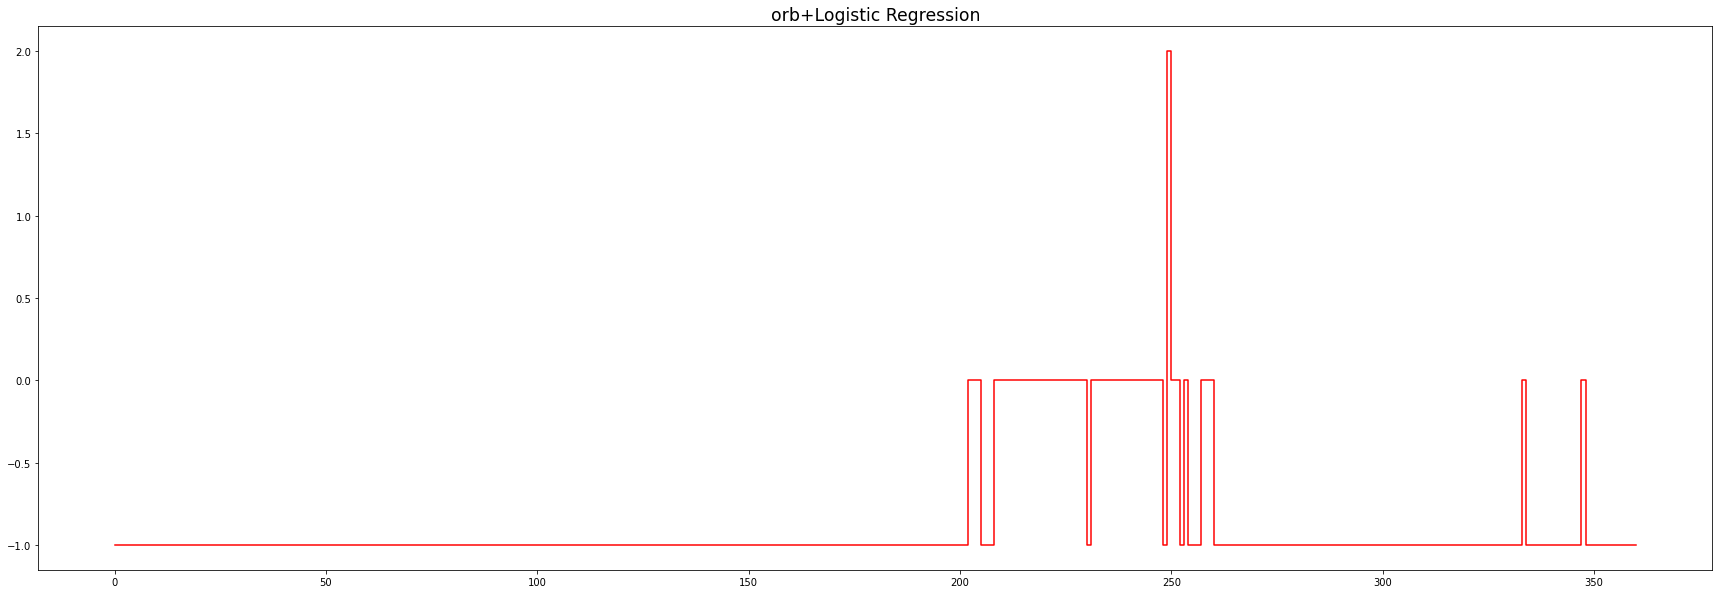

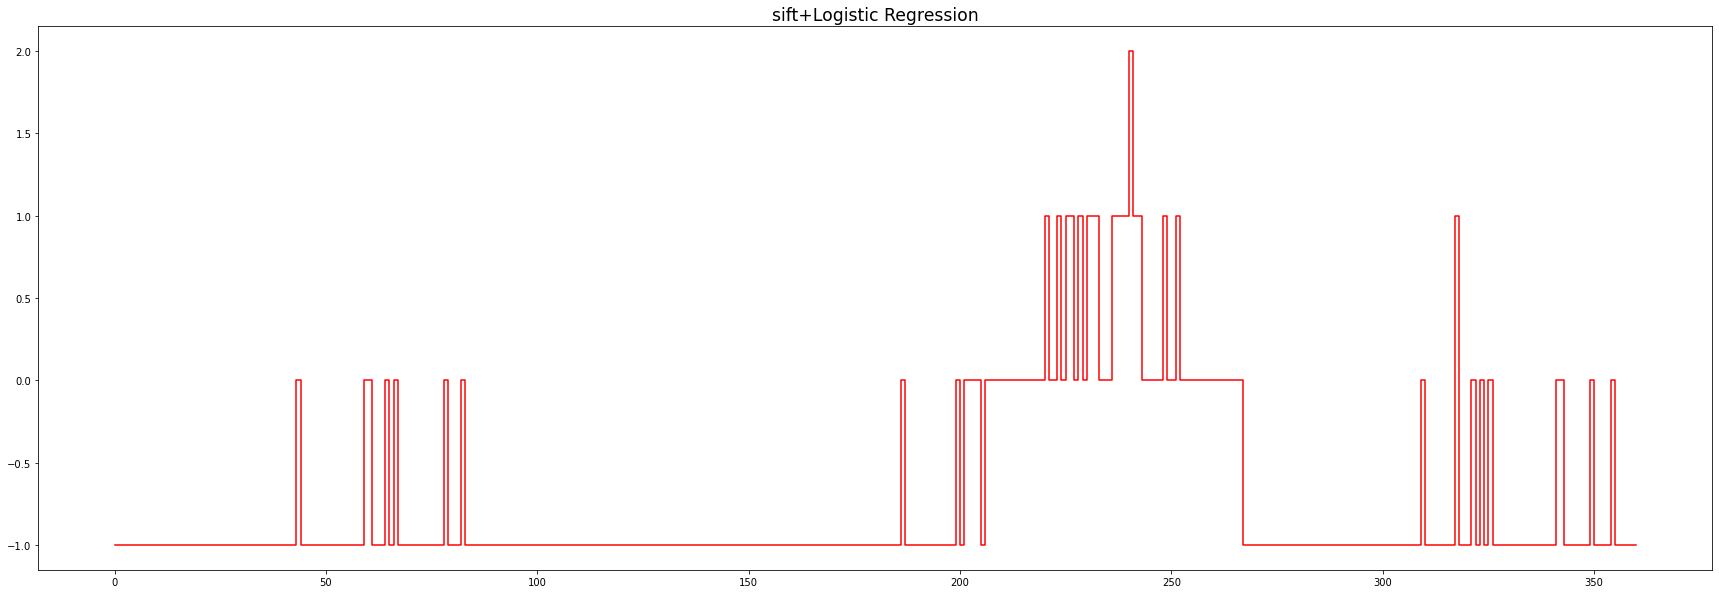

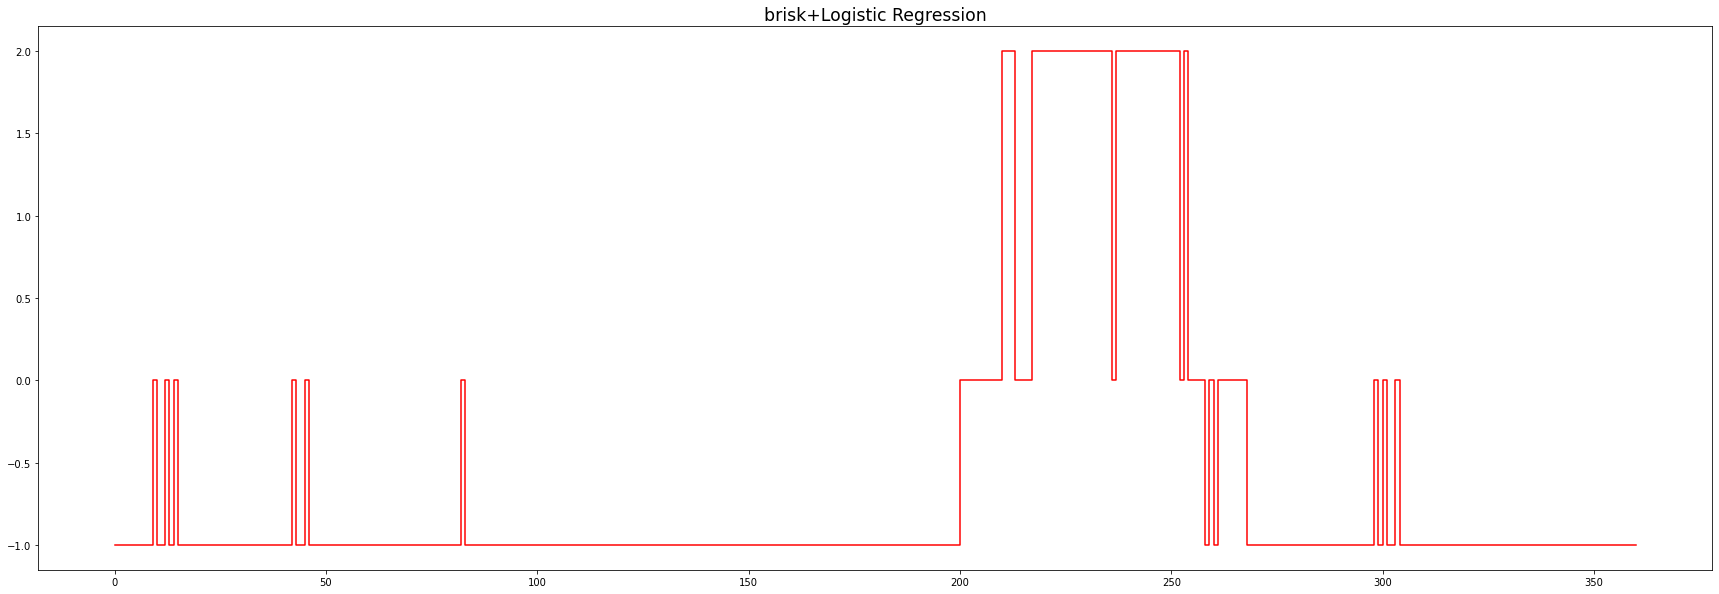

In [14]:
#Logistic Regression
for i in des_list:
    draw(logreg_df[i],i,'Logistic Regression')

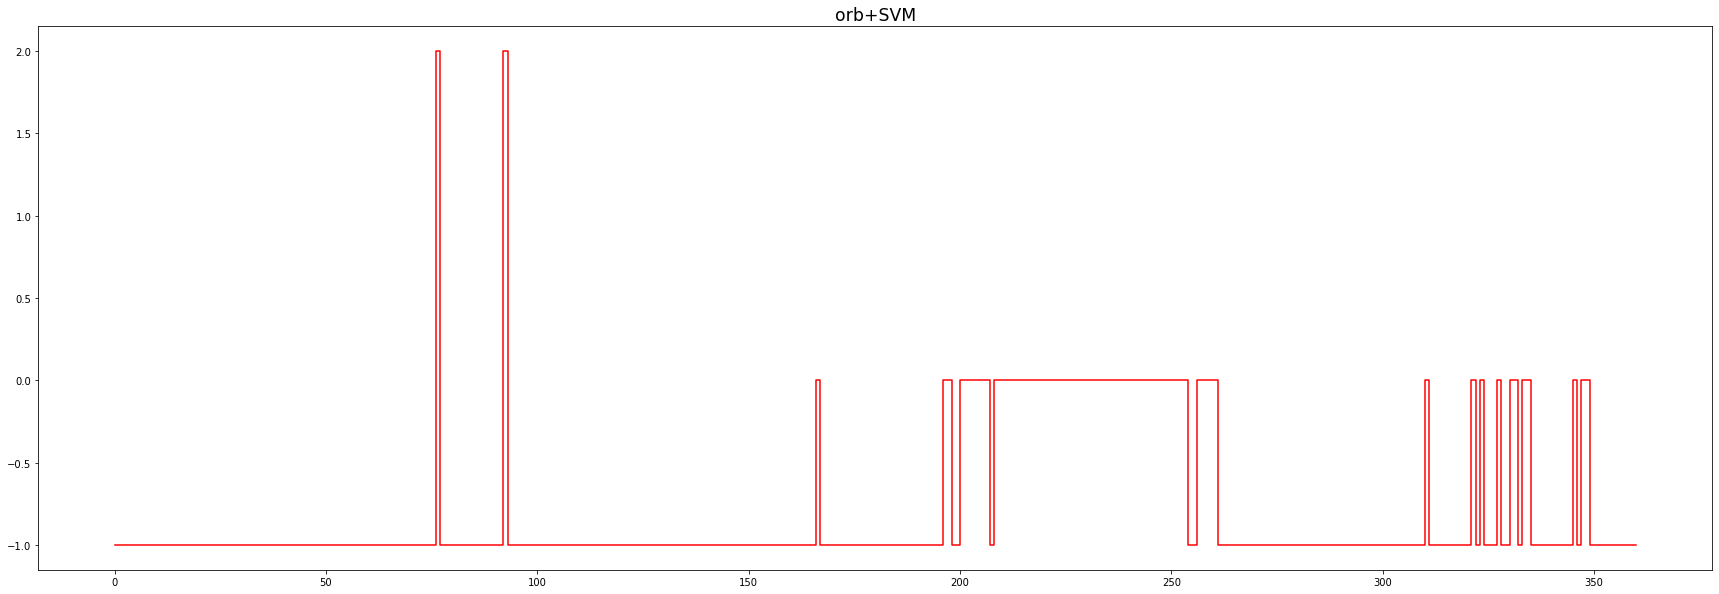

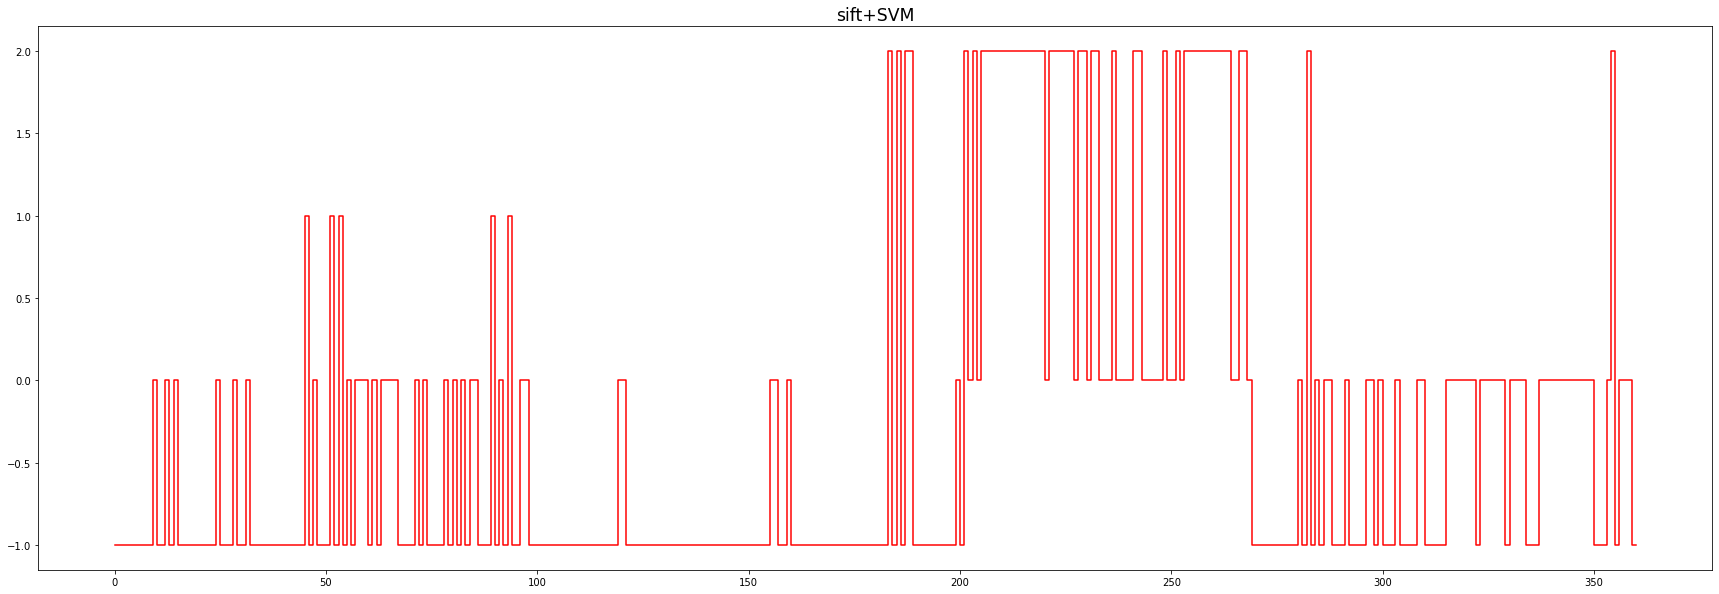

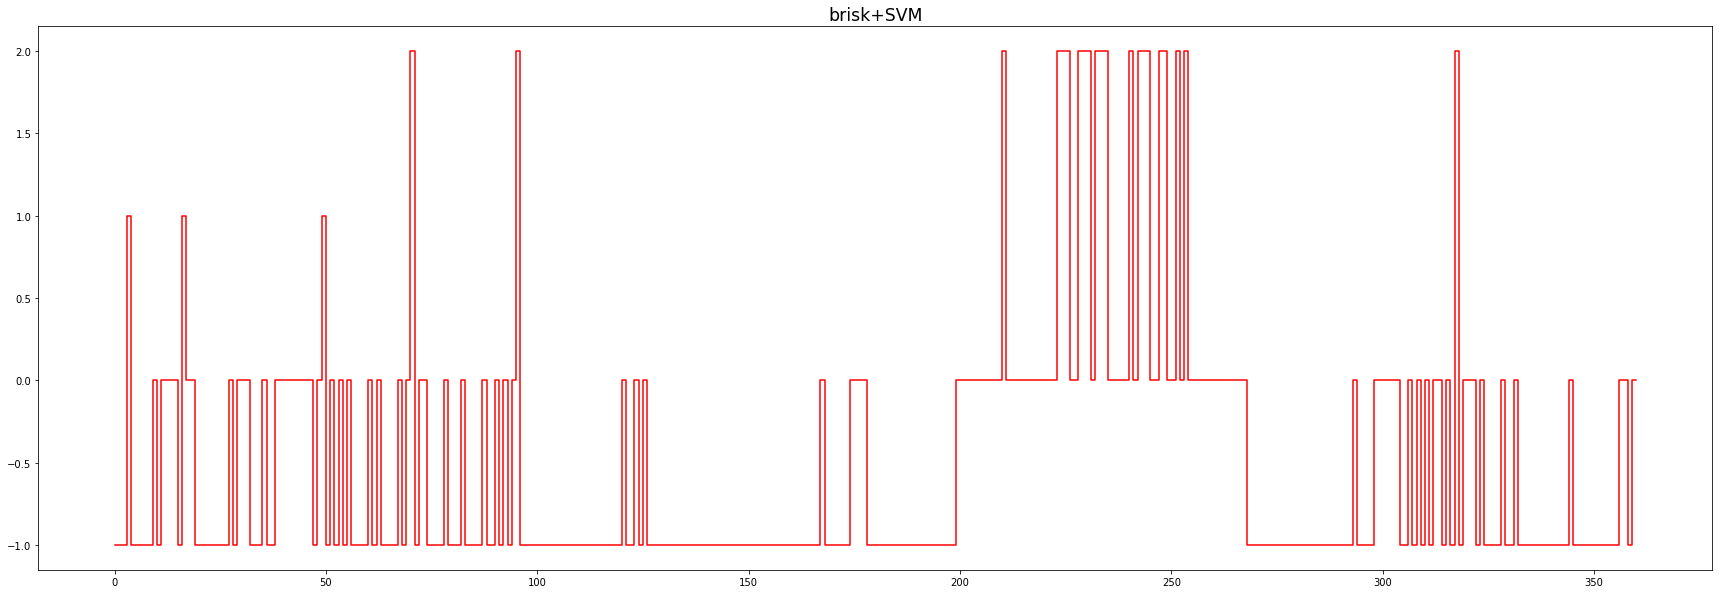

In [15]:
#SVM
for i in des_list:
    draw(svm_df[i],i,'SVM')

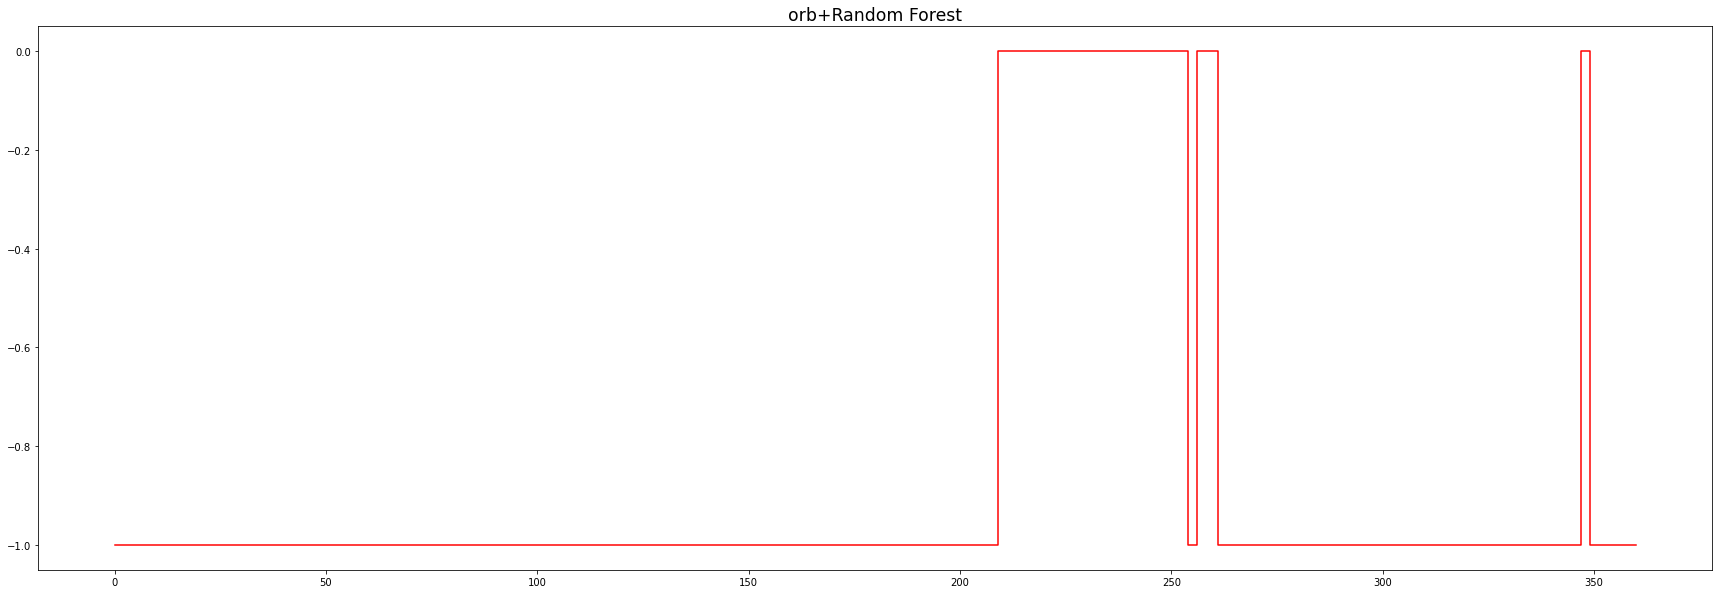

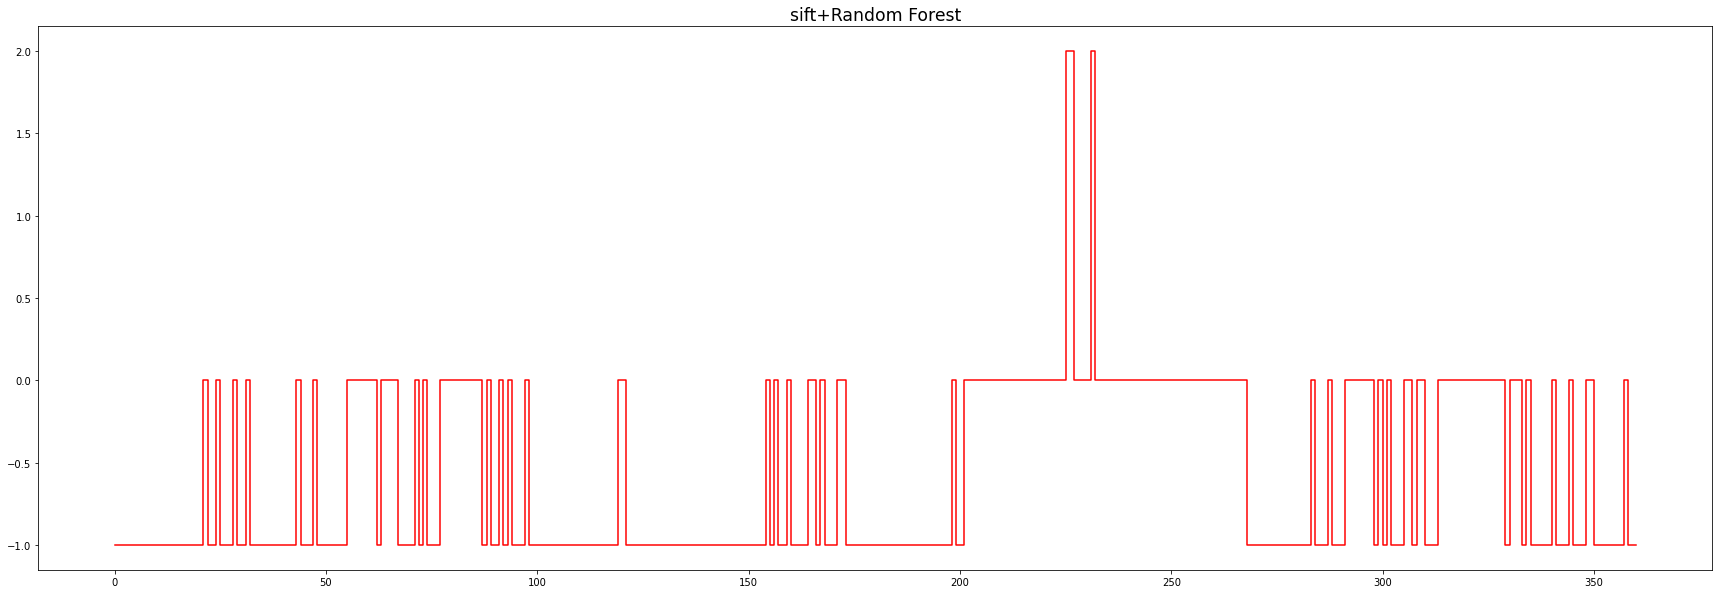

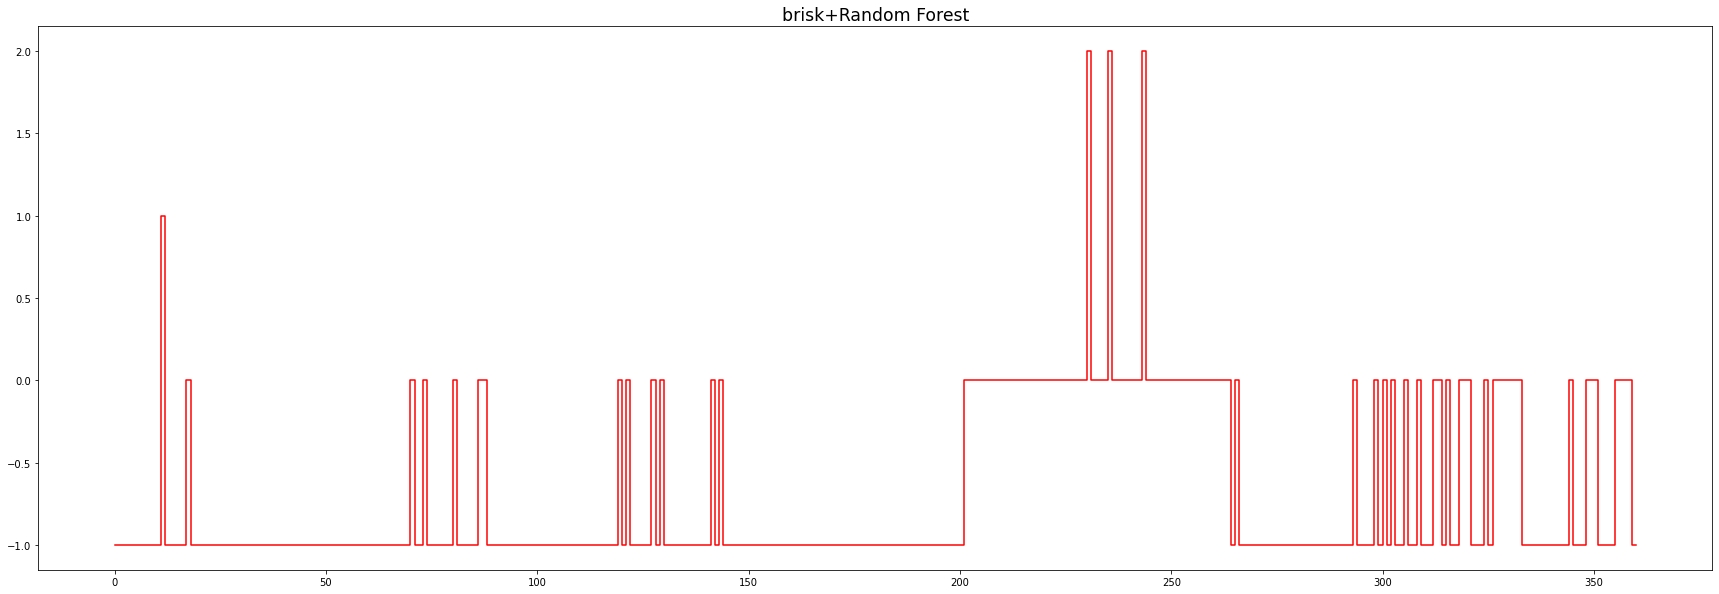

In [16]:
#Random Forest
for i in des_list:
    draw(randomforest_df[i],i,'Random Forest')